# Анализ вариантов обслуживания автобусов на основе имитационной модели

In [1]:
from load_packages import load_packages

load_packages()

In [2]:
from packages.bas_models.src.bus_generator import BusGenerator

generator = BusGenerator([0.4, 0.7])
buses = generator.generate(1)
flights = 10
probs = [
    [0.0,0.05],
    [0.1,0.05],
    [0.2,0.11],
    [0.3,0.11],
    [0.4,0.15],
    [0.5,0.15],
    [0.6,0.19],
    [0.7,0.19],
    [0.8,0.23],
    [0.9,0.23],
    [1.0,0.7]]

In [3]:
from packages.bas_models.src.model import Model

def arrange_statistics(model: Model, timing: [int]):
    statistics = dict()
    
    for time in timing:
        statistics[time] = get_statistics(model, time)
    
    return statistics

def get_statistics(model: Model, days: int) -> int:
    result = 0
    
    for day in range(0, days):
        buses = model.run(flights)
        
        result += sum(list(map(lambda x: x.flights, buses)))
        
        model.reset_buses()
        
    return result / days

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def show_bar(keys, values, precision: int = 3):
    keys = list(map(lambda x: str(x), keys))
    values = list(map(lambda x: round(x, precision), values))
    
    bars = plt.bar(keys, values)
    
    autolabel(bars)
    
    plt.show()
    
def autolabel(bars, xpos='center'):
    xpos = xpos.lower()
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

# Модель без ремонта мелких поломок

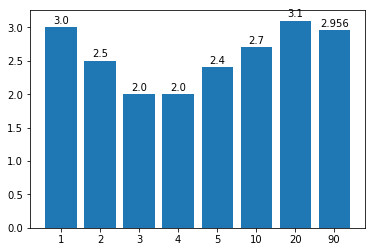

In [9]:
from packages.bas_models.src.nonstop_model import NonstopModel

model = NonstopModel(buses)

statistics = arrange_statistics(model, [1,2,3,4,5,10,20,90])

show_bar(list(statistics.keys()), list(statistics.values()))

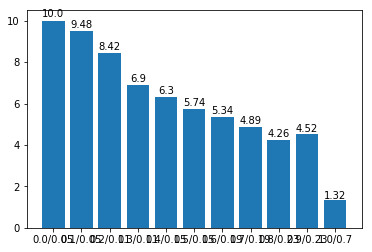

In [18]:
from bus_models.statistics_with_probs import StatisticsWithProbs
from packages.bas_models.src.nonstop_model import NonstopModel

stats_with_probs = StatisticsWithProbs(NonstopModel([]), 90, 10)

statistics = stats_with_probs.arrange_statistics(probs)

show_bar(list(statistics.keys()), list(statistics.values()), 2)

# Модель с ремонтом мелких поломок

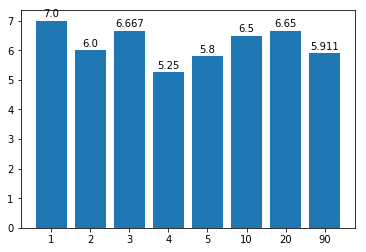

In [10]:
from packages.bas_models.src.repair_model import RepairModel

model = RepairModel(buses)

statistics = arrange_statistics(model, [1,2,3,4,5,10,20,90])

show_bar(list(statistics.keys()), list(statistics.values()))

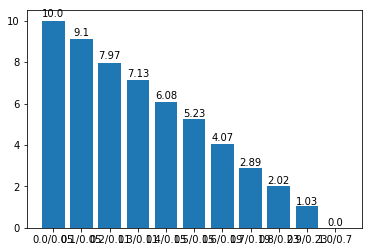

In [17]:
from bus_models.statistics_with_probs import StatisticsWithProbs
from packages.bas_models.src.repair_model import RepairModel

stats_with_probs = StatisticsWithProbs(RepairModel([]), 90, 10)

statistics = stats_with_probs.arrange_statistics(probs)

show_bar(list(statistics.keys()), list(statistics.values()), 2)

# Вывод

В данных условиях модель без ремонта мелких поломок лучше подходит чем модель с ремонтом мелких поломок... Есть идея - если вероятность полной поломки автобуса 